# FDA_HOMEWORK 4
by H54046070_交管108_張仲宇

---
---
### 目錄
1. 介紹
2. 資料分析與預處理
3. 不同模型適配
   - Linear Regression
   - Ridge Regression
   - Random Forest
   - Logistic Regression
   - SVM
   - Neural Network
4. 使用Lasso挑選變數
   - Lasso
   - Random Forest
   - SVM
5. 總結
---
---

## 1. 介紹

這份練習使用加州大學爾灣分校（UCI）所提供，開放給大眾練習機器學習方法的資料集。<br />
過程中將先從資料集的了解、預處理開始，逐步使用不同機器學習方法去了解資料、運用資料， <br />
最終目的為找出一個最精準的方法來預測結果。 <br />

---
---


## 2. 資料分析與預處理

這邊使用["Online Shoppers Purchasing Intention Dataset Data Set"](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)這組資料來做練習。 <br />

根據網站的說明，這份資料包含了12,330筆消費行為(session)，消費行為來自不同使用者，同一個使用者一年內的消費行為只會出現一次，<br />
藉此來避免出現任何與使用者資料、特殊節日有關的特別趨勢。

---
### 檢視資料
首先載入資料，並印出前幾列來看看資料裡有哪些變數：

In [1]:
import pandas as pd
import numpy as np
import time
start_time = time.time()

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<br />
<br />
使用info看一下變數的值、是否有空值、變數類別：

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

這邊可以看到這筆資料共有12330筆，18個變數。 <br />
也可以看到每一個變數的資料型態，在這之中沒有NA值。

<br />
<br />
使用describe先看一下這個資料大概的分佈：

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
print(df['VisitorType'].value_counts(), '\n \n')
print(df['Weekend'].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64 
 

False    9462
True     2868
Name: Weekend, dtype: int64


---
### 變數說明

網頁上對於變數的解說有點模糊，不過以下會依照上面檢視資料所得的以及我自己的理解打出來，可能會有錯。

- 以下幾個變數是關於消費者網頁瀏覽行為的，共有三類（但也沒說清楚）。例如消費者開啟一個網頁或是從一個網頁點到另一個網頁，都會被記錄下來。（好恐怖）
 - **Administrative**：
 - **Administrative Duration**：
 - **Informational**：
 - **Informational Duration**：
 - **Product Related**：和產品相關的網頁
 - **Product Related Duration**：瀏覽和產品相關網頁的時間
 
 
- 以下幾個變數是由"Google Analytics"在電子商務網站所紀錄。
 - **Bounce Rate**：對於這個網頁，消費者從另一網頁進入到離開中間沒有觸發其他request的比例。
 - **Exit Rate**：對特定一個網頁的所有瀏覽者來說，在這筆消費行為中停留的比例。
 - **Page Value**：這個網頁在一個消費者完成一個電子商務動作前被瀏覽的平均值。

 - **Special Day**：跟消費者訪問網頁距離特殊節日的時間點有關，代表更高的商業行為可能性。這個屬性值是由動態的電子商務行為決定的，例如這個值在情人節之前的02/02~02/12不會是0，在這個區間之前或之後為0，除非又鄰近下個節日，而且最大值1出現在02/08。
 
 
- 還有幾個類別變數：
 - **Month**：在幾月發生，他會直接寫出月份代號，如Feb。
 - **Operating Systems**：運行的系統，根據上面describe，最大到8。
 - **Browser**：瀏覽器，最大到13。
 - **Region**：地區，最大到9。
 - **Traffic Type**：最大到20。
 - **Visitor Type**：消費者的分類，共有3類，分別為"Returning_Visitor"、"New_Visitor"和"Other"。
 - **Weekend**：是否為週末，分成True/False兩類。
 - **Revenue**：是否消費，分成True/False兩類。這個也是**這次要預測的變數**。

---

既然Revenue為這次要預測的變數那就來看一下分佈情形：

In [6]:
print(df['Revenue'].value_counts())

False    10422
True      1908
Name: Revenue, dtype: int64


在全部12,330筆資料中，1908筆（84.5%）完成消費行為，其餘10422筆沒有完成消費行為。 <br />
這個問題是一個分類的問題，藉由其他變數來預測這筆資料屬於哪一類。


### 視覺化檢視
接下來用視覺化的方式看看變數間有沒有存在什麼關係。

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
#### Countplot
先用基本的countplot看一下類別的變數的分佈情形：

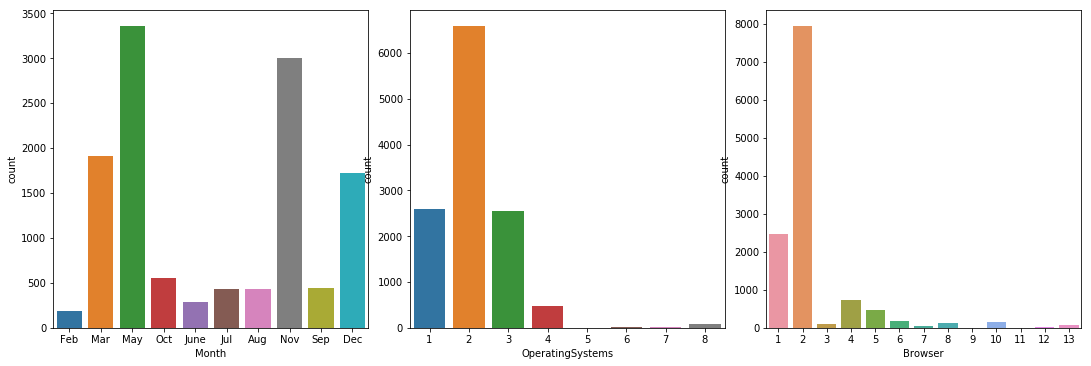

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15, 5)) 
plt.tight_layout()
sns.countplot(x="Month", data=df,ax=ax[0])
sns.countplot(x="OperatingSystems", data=df,ax=ax[1])
sns.countplot(x="Browser", data=df,ax=ax[2])

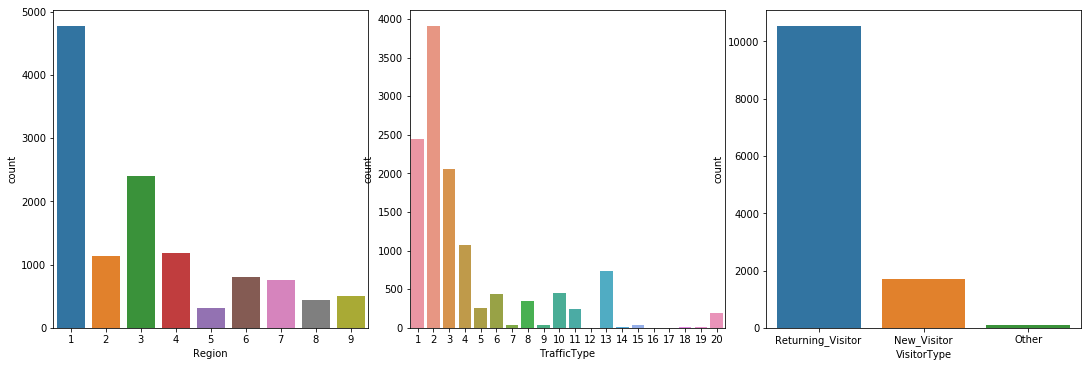

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15, 5)) 
plt.tight_layout()
sns.countplot(x="Region", data=df,ax=ax[0])
sns.countplot(x="TrafficType", data=df,ax=ax[1])
sns.countplot(x="VisitorType", data=df,ax=ax[2])

---
#### Heatmap
這邊用這筆資料的相關係數做heatmap檢視。

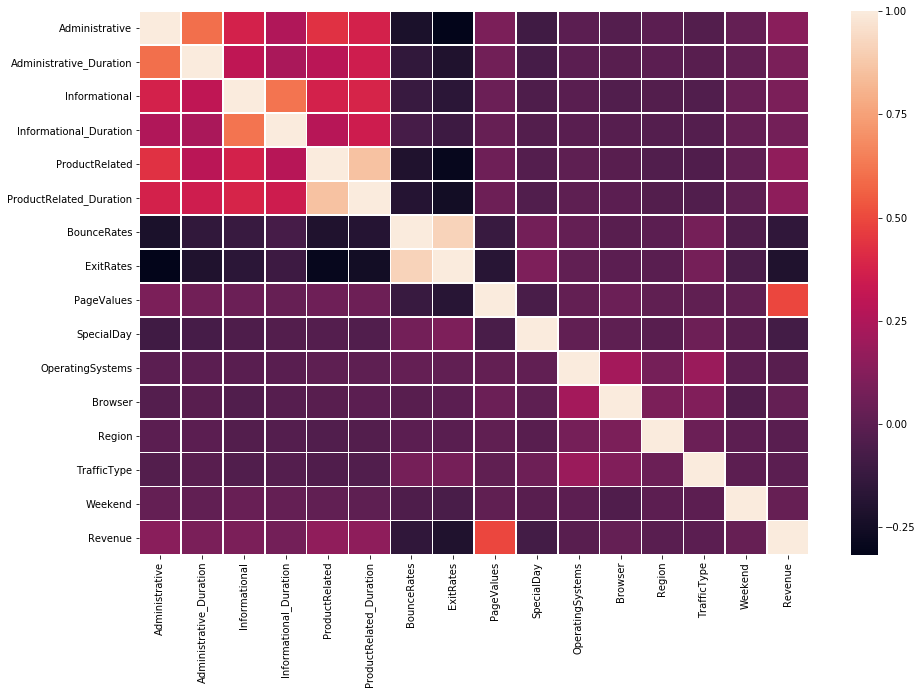

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.5)

兩個變數之間的顏色越接近黑色越負相關，越接近淺米色越正相關。 <br />

從上面看來，(BounceRates, ExitRates)、(ProductRelated, ProductRelated_Duration)呈現比較高一點的正相關， <br />

'BounceRates'、'ExitRates'和'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'這幾個網頁瀏覽相關變數呈現比較高的負相關。 <br />

而我們要預測的變數'Revenue'，和'PageValues'的正相關性比較強，和'BounceRates'、'ExitRates'的負相關性比較強。

---
回到上面describe來看，前面6個變數**（Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration）**的分布有點廣，最大值和第三四分位數有一段距離。

用boxplot看一下分佈範圍以及情況：

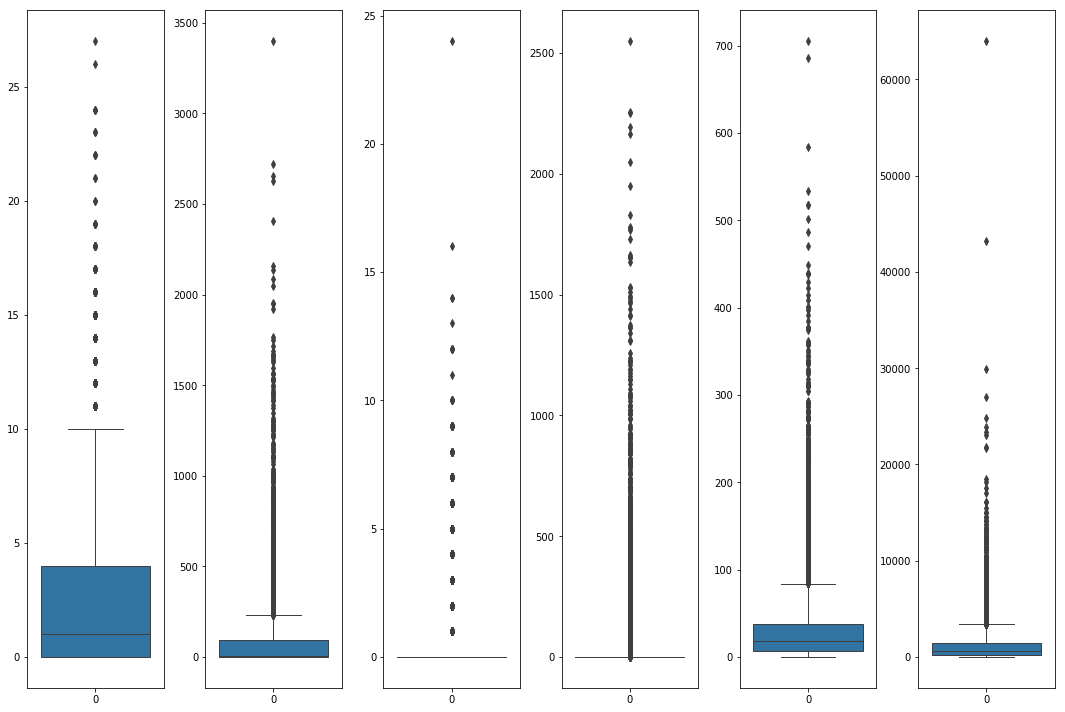

In [11]:
fig, ax =plt.subplots(1,6, figsize=(15,10))
plt.tight_layout()
for i in range(6):
    sns.boxplot(data=df.iloc[:,i], linewidth=1, ax=ax[i])

每個變數的值大多都集中在較低的數值，但是分佈範圍卻很廣。 <br/>
要不要當作離群值處理是個好問題。 <br/>
先看看其他變數**（'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',）**的分佈情形吧：

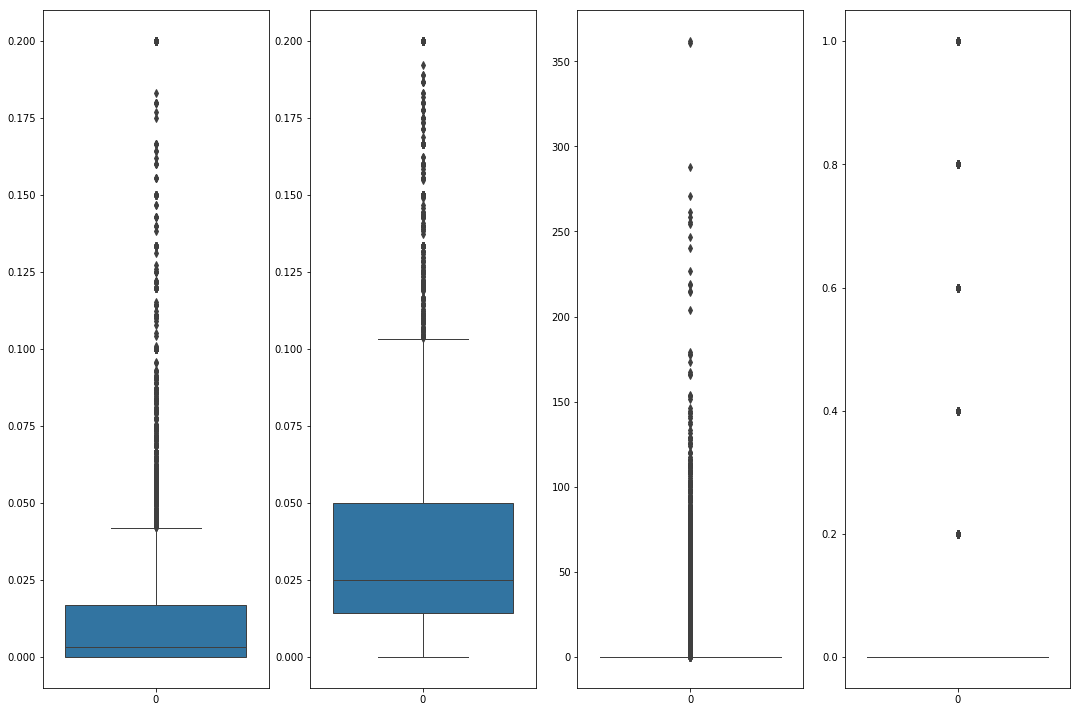

In [12]:
fig, ax =plt.subplots(1,4, figsize=(15,10))
plt.tight_layout()
for i in range(6,10):
    sns.boxplot(data=df.iloc[:,i], linewidth=1, ax=ax[i-6])

---

### 類別變數轉換

將"Weekend"和"Revenue"兩個變數的布林值轉換成數字0/1：

In [13]:
df['Weekend'] = df.Weekend.astype('int')
df['Revenue'] = df.Revenue.astype('int')

<br />
因為"Month"和"VisitorType"變數類別是object，接下來用get_dummies將他們變成dummy variable的one-hot編碼：

In [14]:
df = pd.get_dummies(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
OperatingSystems                 12330 non-null int64
Browser                          12330 non-null int64
Region                           12330 non-null int64
TrafficType                      12330 non-null int64
Weekend                          12330 non-null int64
Revenue                          12330 non-null int64
Month_Aug    

到這邊所有的變數就都轉換成數字的型態了，之後會比較好處理。

---
---

## 3. 不同模型適配

對資料進行前處理後，正式進入重點，接下來將會利用不同的機器學習模型來進行適配，希望能找出一個高精準度的方法。

---

### 分割Training / Testing Set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df
y = df['Revenue']
x = x.drop(['Revenue'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print('Length of Training Set:', len(x_train))
print('Length of Testing Set:', len(x_test))

Length of Training Set: 9247
Length of Testing Set: 3083


---
先使用線性模型試試看。

---
### Linear Regression

In [18]:
import numpy as np
from sklearn import linear_model, metrics, model_selection

In [19]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('* Intercept: \n', lm.intercept_ )
print('* Coefficients: \n', lm.coef_)

print("* MSE: %.3f"
      % metrics.mean_squared_error(y_test, y_pred))

print('* R Square: %.3f' % metrics.r2_score(y_test, y_pred))

* Intercept: 
 0.11909739350802906
* Coefficients: 
 [ 1.33642113e-03 -1.01701888e-05  2.05681817e-03  1.28424564e-05
  1.46534347e-04  1.28086117e-05  5.22752191e-01 -1.07978166e+00
  9.23665791e-03 -1.73982686e-02 -6.67928168e-03  4.35036986e-03
 -6.24587811e-04 -5.78716525e-04  1.09961507e-02  4.95447680e-03
 -3.99392942e-02 -5.03625428e-02  2.27660213e-02 -1.11764678e-02
 -2.40179785e-02 -2.16266303e-02  7.72767340e-02  2.96038662e-02
  1.25218153e-02  3.90071573e-02 -2.93887093e-02 -9.61844793e-03]
* MSE: 0.091
* R Square: 0.268


In [20]:
lm = linear_model.LinearRegression()

mse = model_selection.cross_val_score(lm, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('neg MSE:', mse.mean())

neg MSE: -0.09478647074563198


---
### Ridge Regression

In [21]:
alpha_list = np.linspace(start=0, stop=0.5, num=20)

reg = linear_model.RidgeCV(alphas=alpha_list, cv=10)
reg.fit(x_train, y_train)

best_alpha = reg.alpha_
print('Best Alpha:', reg.alpha_ )

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.36885e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.54402e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.2079e-23): result may not be accurate.
  overwrite_a=True).T


Best Alpha: 0.05263157894736842


In [22]:
reg = linear_model.Ridge(alpha=best_alpha)
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print('* Intercept: \n', reg.intercept_ )
print('* Coefficients: \n', reg.coef_)

print("* MSE: %.3f"
      % metrics.mean_squared_error(y_test, y_pred))

print('* R Square: %.3f' % metrics.r2_score(y_test, y_pred))

* Intercept: 
 0.11836975318981474
* Coefficients: 
 [ 1.35873453e-03 -1.00933732e-05  2.06133667e-03  1.28378359e-05
  1.49574779e-04  1.27875492e-05  4.99323353e-01 -1.05416003e+00
  9.23975813e-03 -1.75093027e-02 -6.66619983e-03  4.34369321e-03
 -6.21944438e-04 -5.79210782e-04  1.10313829e-02  4.94631681e-03
 -3.99276384e-02 -5.03807889e-02  2.27568420e-02 -1.12829907e-02
 -2.40185098e-02 -2.15954758e-02  7.72909762e-02  2.96436693e-02
  1.25675993e-02  3.91493833e-02 -2.94665916e-02 -9.68279180e-03]
* MSE: 0.091
* R Square: 0.268


運用迴歸的方法來預測這個問題好像有點怪怪的，因為預測出來的結果並不會是0或是1，而是一個**介於0到1之間的值**， <br/>
只能評斷MSE之類的標準。

---
接下來用分類的方法試試看好了。

---

### Random Forest

In [23]:
from sklearn import ensemble, preprocessing

In [24]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9056114174505352


上面是用直接用N=100去適配模型並用x_test預測y_test得到的準確率。

接下來用**交叉驗證**的方式利用x_train去找出最佳的N（因為切太多會跑很久所以這邊就跑100~150間隔10）：

In [25]:
forest_range = np.arange(100, 151, 10)
forest_scores = []

for i in forest_range:
    forest = ensemble.RandomForestClassifier(n_estimators = i)
    scores = model_selection.cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
    forest_scores.append(scores.mean())

In [26]:
forest_plot = pd.DataFrame()
forest_plot['N'] = forest_range
forest_plot['CV Accu'] = forest_scores
forest_best = forest_plot[forest_plot['CV Accu'] == forest_plot['CV Accu'].max()]
print('Best Result:\n',forest_plot[forest_plot['CV Accu'] == forest_plot['CV Accu'].max()])

Best Result:
      N   CV Accu
5  150  0.902348


將不同N用交叉驗證所跑出來的結果畫成圖表：

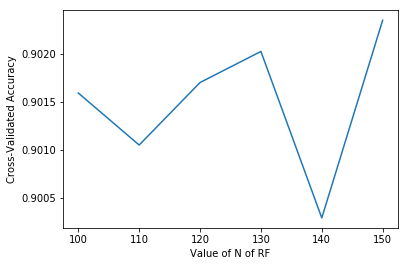

In [27]:
plt.plot(forest_plot['N'],forest_plot['CV Accu'])
plt.xlabel('Value of N of RF')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

藉由交叉驗證，可以得到最高準確率的N，<br/>
然後就用這個N去配適x_test，預測y_test看看準確率如何。 <br />
因為發現每次跑出來忽高忽低的情形，所以就採用10次平均。

In [28]:
accu_list = []
for i in range(10):
    forest = ensemble.RandomForestClassifier(n_estimators = int(forest_best['N']))
    forest_fit = forest.fit(x_train, y_train)

    y_pred = forest.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accu_list.append(accuracy)
    
print('Mean Accuracy:', np.mean(accu_list))

Mean Accuracy: 0.9077846253649042


結果是比直接什麼也不管，用N=100的好一點點。

---
### Logistic Regression

In [29]:
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)

print(lr.coef_)
print(lr.intercept_ )

[[ 1.44877699e-02 -4.15416357e-05  3.12839298e-02  1.89089519e-05
   2.82801277e-03  6.82318788e-05 -1.41473760e+00 -1.85967996e+00
   8.77572914e-02 -3.12559094e-01 -7.07085817e-02  4.23274525e-02
   4.91953718e-04 -6.74741813e-03  1.73386261e-01 -4.35576622e-02
  -6.26163859e-01 -1.07138252e+00  1.30810421e-01 -2.15372998e-01
  -3.80855692e-01 -4.18076525e-01  6.16797978e-01  1.79421442e-01
   8.40770893e-02 -2.74149943e-01 -6.22880629e-01 -8.47271758e-01]]
[-1.74430233]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
y_pred = lr.predict(x_test)
accu = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

Accuracy: 0.8887447291599092


使用原始的logistic regression跑出來的結果如上，還算不錯， <br/>
接下來利用他已經創好的交叉驗證方法（**LogisticRegressionCV**）試試。 <br/>
在這邊如果沒有先把資料標準化會一直出現無法收斂的警告，所以先把資料標準化，並另存成x_train_std, x_test_std。

In [31]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [32]:
clf = linear_model.LogisticRegressionCV(cv=10, random_state=0,max_iter=100)
clf.fit(x_train_std, y_train)

y_pred = clf.predict(x_test_std)
accu = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

Accuracy: 0.8897178073305222


在logistic regression這邊使用交叉驗證的結果會好一點點，但還是比剛剛用隨機森林的結果差。 <br/>
但是在這邊因為沒有什麼參數需要調~~（不知道調什麼）~~的關係，所以做了交叉驗證沒有多大意義。

---
### SVM
這邊使用scikit-learn的SVC

In [33]:
from sklearn.svm import SVC

先使用預設的設定：<br />
SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None) 跑一次

In [34]:
svm = SVC()
svm.fit(x_train_std, y_train)
y_pred = svm.predict(x_test_std)

accu = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

Accuracy: 0.8978267920856309


使用預設設定跑出來的準確率接近9，還算可以。 <br />
接下來試試看不同penalty和不同kernel有什麼差別。 <br />
使用交叉驗證的話需要跑比較久一點的時間，所以這邊先使用自己寫迴圈，每個penalty都只跑一次，沒有交叉：

In [35]:
penalty_range = np.linspace(start=0.1, stop=2.1, num=10)

data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0

for i in penalty_range:
    svm = SVC(C=i, gamma='auto_deprecated')
    svm.fit(x_train_std, y_train)

    acc_train = metrics.accuracy_score(y_train, svm.predict(x_train_std))
    acc_test = metrics.accuracy_score(y_test, svm.predict(x_test_std))
    data_plt.loc[count] = [i, acc_train, acc_test]
    count += 1

The Best Accuracy:
    penalty  acc_train  acc_test
5  1.211111   0.905483  0.899773


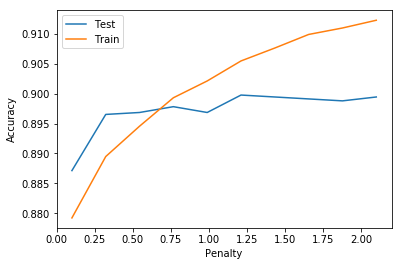

In [36]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

因為沒有使用training set去交叉驗證出一個penalty再用testing set去跑的關係， <br />
所以這邊每個penalty都直接去試training set和testing set。可以得到一個最高精準度的C。 <br />

那因為上面預設的kernel函數是"rbf"，**接下來試試看"linear"和"poly"** <br />

**Linear:**

In [37]:
penalty_range = np.linspace(start=0.1, stop=2.1, num=10)

data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0

for i in penalty_range:
    svm = SVC(C=i, kernel='linear', gamma='auto_deprecated')
    svm.fit(x_train_std, y_train)

    acc_train = metrics.accuracy_score(y_train, svm.predict(x_train_std))
    acc_test = metrics.accuracy_score(y_test, svm.predict(x_test_std))
    data_plt.loc[count] = [i, acc_train, acc_test]
    count += 1

The Best Accuracy:
    penalty  acc_train  acc_test
0  0.100000   0.883962  0.891015
1  0.322222   0.883962  0.891015
2  0.544444   0.883962  0.891015
3  0.766667   0.883962  0.891015
7  1.655556   0.883962  0.891015


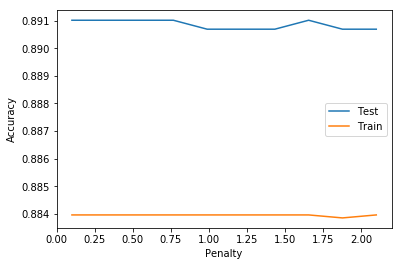

In [38]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

上圖中的test精準度都大於train的精準度，蠻奇怪的。

**Poly:**

In [39]:
penalty_range = np.linspace(start=0.1, stop=2.1, num=10)

data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0

for i in penalty_range:
    svm = SVC(C=i, kernel='poly', gamma='auto_deprecated')
    svm.fit(x_train_std, y_train)

    acc_train = metrics.accuracy_score(y_train, svm.predict(x_train_std))
    acc_test = metrics.accuracy_score(y_test, svm.predict(x_test_std))
    data_plt.loc[count] = [i, acc_train, acc_test]
    count += 1

The Best Accuracy:
    penalty  acc_train  acc_test
8  1.877778    0.90797  0.891664


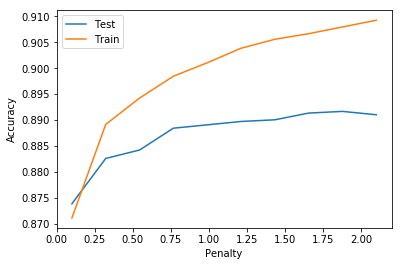

In [40]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

看起來都差不多呢。 <br />
不過使用"rbf"的準確率能夠超過9成，比起上面的logistic regression好一點了。

---
### Neural Network

In [41]:
from keras import models, layers, optimizers, regularizers
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


先設定權重：

In [42]:
print(y_train.value_counts())

0    7786
1    1461
Name: Revenue, dtype: int64


In [43]:
class_weight = {
    0: 7786/9247,
    1: 1461/9247
}

建立神經網路架構：

In [44]:
def build_model(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=28,
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

In [45]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=5):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [46]:
hidden_units = 10
activation = 'relu'
l2 = 0.01
learning_rate = 0.05
epochs = 50
batch_size = 32

model = build_model(hidden_units, activation, learning_rate)

accu = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test, n=5)
    
acc_train = np.mean(accu[0])
acc_test = np.mean(accu[1])

Instructions for updating:
Colocations handled automatically by placer.


  0%|          | 0/5 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


100%|██████████| 5/5 [01:49<00:00, 21.79s/it]

Avgerage Training Accuracy: 0.8420028117420584
Avgerage Testing Accuracy: 0.8550113525786571


看起來神經網路的準確率反而不如上面其他分類器， <br />
而且做出來也比較不好解釋，調參數也不知道在幹嘛，為什麼調（我是說我自己）， <br />
所以在這邊我就做一次就好，大概知道一下這題用神經網路做的準確率。


---
---
## 4. 使用Lasso挑選變數


上面的方法都使用全部的變數進去fit，但是有些變數可能對於模型的影響不大，需要被剔除以增加精準度， <br />
這時可以使用跟Ridge Regression很像的Lasso， <br />
這兩者都可以達到縮小變數的效果，不同的是，Lasso會將有些變數縮小至0，達成挑選變數的效果。

In [47]:
alpha_list = np.linspace(start=0, stop=0.5, num=20)

lassocv = linear_model.LassoCV()
lassocv.fit(x_train, y_train)

best_alpha = lassocv.alpha_
print('Best Alpha:', lassocv.alpha_ )

Best Alpha: 0.10566375212056409


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


先用Cross Validation挑出最佳的alpha值。 <br />
再用這個alpha去跑lasso：

In [48]:
lasso = linear_model.Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

print('* Intercept: \n', lasso.intercept_ )
print('* Coefficients: \n', lasso.coef_)

print("* MSE: %.3f"
      % metrics.mean_squared_error(y_test, y_pred))

print('* R Square: %.3f' % metrics.r2_score(y_test, y_pred))

* Intercept: 
 0.06791508145092247
* Coefficients: 
 [ 0.00000000e+00  3.83316369e-05  0.00000000e+00  1.53987954e-05
  4.23031077e-04  1.44843799e-05 -0.00000000e+00 -0.00000000e+00
  9.43384548e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
* MSE: 0.094
* R Square: 0.242


由上面的R Square看來只有0.242不是很高， <br />
但是這邊要做的是變數挑選，重點是有哪些變數被挑掉。 <br />
可以看到在變數那邊有很多的變數**被縮小成0了**，這就是接下來要拿掉的變數。

In [49]:
count=0
zero_list = []
for i in lasso.coef_:
    if i == 0:
        zero_list.append(count)
    count += 1

In [50]:
x_train_sub = x_train
x_train_sub = x_train_sub.drop(x_train_sub.columns[[zero_list]], axis=1)
x_test_sub = x_test
x_test_sub = x_test_sub.drop(x_test_sub.columns[[zero_list]], axis=1)
x_train_sub.head(3)

/usr/local/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues
6986,0.000000,0.0,63,2593.808333,0.000000
7438,0.000000,114.8,22,583.093333,2.749717
9981,261.161905,0.0,58,1992.717308,0.000000


把x_train和x_test都創建一個sub的變數，以防之後還會用到原本的。<br />
可以看到x_train_sub裡只剩下剛剛Lasso挑選過後倖存的變數們。

---

接下來用這些變數來試試看剛剛跑出最高準確率的Random Forest和SVM：
### Random Forest

In [51]:
forest = ensemble.RandomForestClassifier(n_estimators = 150)
forest_fit = forest.fit(x_train_sub, y_train)

y_pred = forest.predict(x_test_sub)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8845280570872527


結果**準確率反而比較低** ＱＱ

### SVM

In [52]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train_sub)

x_train_sub = scaler.transform(x_train_sub)
x_test_sub = scaler.transform(x_test_sub)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [53]:
svm = SVC()
svm.fit(x_train_sub, y_train)
y_pred = svm.predict(x_test_sub)

accu = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accu)

Accuracy: 0.8936101200129744


In [54]:
penalty_range = np.linspace(start=0.1, stop=2.1, num=20)

data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0

for i in penalty_range:
    svm = SVC(C=i, gamma='auto_deprecated')
    svm.fit(x_train_sub, y_train)

    acc_train = metrics.accuracy_score(y_train, svm.predict(x_train_sub))
    acc_test = metrics.accuracy_score(y_test, svm.predict(x_test_sub))
    data_plt.loc[count] = [i, acc_train, acc_test]
    count += 1

The Best Accuracy:
    penalty  acc_train  acc_test
3  0.415789   0.894344  0.895881
4  0.521053   0.895426  0.895881


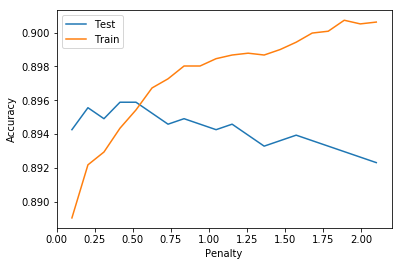

In [55]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

看來使用subset跑出來的SVM準確率也是低一點點。 <br/>

---
---
## 5. 總結

1. 前面6個變數的分佈太廣，但是不知道該不該處理掉，因為好像不太算離群值，而且最後Lasso挑選過後還留下4個，所以這邊的處理可能是關鍵。
1. 線性模型的R Square不算太高（但其實0.2也不錯了），但這題最後結果為0/1分類，不太適合線性模型。
1. 感覺後面幾個類別變數對於整個模型沒什麼影響，後面拿掉對於精確率的影響不大。
1. 使用Lasso挑選變數後，做出來的模型準確率反而低一點點。
1. 使用全部變數的Random Forest準確率最高，能夠破0.9，複雜的Neural Network反而最低。

In [56]:
end_time = time.time()
print("Total Time: %f sec" % (end_time - start_time))

Total Time: 427.294229 sec
